In [5]:
# Imports

from utils import generate_dataset
import numpy as np
import matplotlib.pyplot as plt
from methods.resampling import ResamplingMethods
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [6]:
# Generate dataset
np.random.seed(124)
x, y = generate_dataset(100)

## Bootstrap MSE vs. Cross-Validation MSE for OLS, Ridge, and Lasso

In [7]:
max_degree = 50
resampling_methods = ResamplingMethods(x,y, max_degree=max_degree)

n_bootstraps = 100
k_folds = 10

lambda_ridge = 1e-2
lambda_lasso = 1e-2

models = [
    ("OLS", LinearRegression(fit_intercept=False), 'C0'),
    ("Ridge", Ridge(fit_intercept=False, alpha=lambda_ridge, max_iter=2000), 'C1'), # Increased max_iter to ensure convergence
    ("Lasso", Lasso(fit_intercept=False, alpha=lambda_lasso, max_iter=2000), 'C2'),
]

bootstrap_mse_values = []
cross_validation_mse_values = []
for name, model, color in models:
    resampling_methods.model = model
    bootstrap_mse = resampling_methods.bootstrap(n_bootstraps=n_bootstraps)[0]
    cross_validation_mse = resampling_methods.k_fold_cross_validation(k_folds)
    bootstrap_mse_values.append(bootstrap_mse)
    cross_validation_mse_values.append(cross_validation_mse)

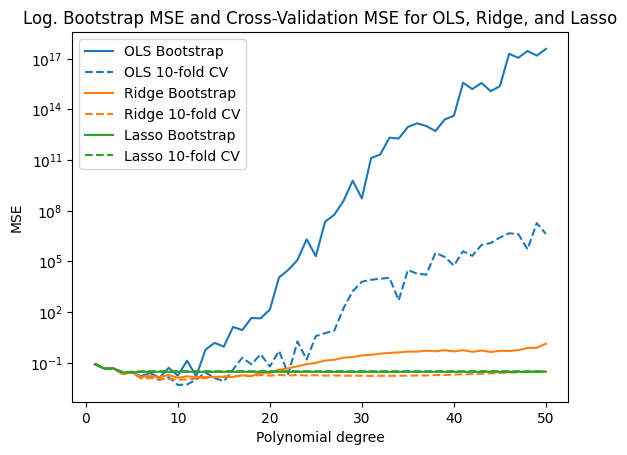

In [8]:
# Plot of OLS, Ridge, and Lasso
for i, (name, model, color) in enumerate(models):
    plt.plot(range(1,max_degree+1), bootstrap_mse_values[i], color=color, label=f"{name} Bootstrap")
    plt.plot(range(1,max_degree+1), cross_validation_mse_values[i], "--", color=color, label=f"{name} {k_folds}-fold CV")

plt.yscale("log")
plt.legend()
plt.title("Log. Bootstrap MSE and Cross-Validation MSE for OLS, Ridge, and Lasso")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
# plt.savefig("../figs/bootstrap_cv_mse.pdf")
plt.show()